In [1]:
import os
import pandas as pd

In [2]:
df = pd.read_csv(os.path.join("data","CZ_RADIO_TOP_100_tydenni.csv"))

In [3]:
df = df.sort_values(by = ['rok','tyden','pozice'], ascending=True)

In [4]:
df['wk'] = df['week'].rank(method='dense').astype(int)

In [5]:
premiery_pisni = pd.DataFrame(df.groupby(['interpret_hlavni','track'])['wk'].min()).reset_index().rename(columns={'wk': 'wk_poprve'})

In [6]:
df = df.merge(premiery_pisni, on=['interpret_hlavni','track'], how='outer')

In [7]:
df['tyden_pisne'] = df['wk'] - df['wk_poprve'] + 1

In [8]:
df['tyden_pisne_bez_pauz'] = df.groupby(['interpret_hlavni', 'track']).cumcount() + 1

In [9]:
df

,Unnamed: 0,hitparada,rok,tyden,week,pozice,track,interpret,interpret_hlavni,vydavatel,wk,wk_poprve,tyden_pisne,tyden_pisne_bez_pauz
0,100,CZ - RADIO - TOP 100,2006,1,2006-01,1,Hung Up,Madonna,Madonna,Warner Music,1,1,1,1
1,200,CZ - RADIO - TOP 100,2006,2,2006-02,1,Hung Up,Madonna,Madonna,Warner Music,2,1,2,2
2,300,CZ - RADIO - TOP 100,2006,3,2006-03,1,Hung Up,Madonna,Madonna,Warner Music,3,1,3,3
3,401,CZ - RADIO - TOP 100,2006,4,2006-04,2,Hung Up,Madonna,Madonna,Warner Music,4,1,4,4
4,500,CZ - RADIO - TOP 100,2006,5,2006-05,1,Hung Up,Madonna,Madonna,Warner Music,5,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90995,97155,CZ - RADIO - TOP 100,2023,43,2023-43,56,Red Flags,Plain White T´S,Plain White T´S,Universal Music,907,907,1,1
90996,97157,CZ - RADIO - TOP 100,2023,43,2023-43,58,Do It Again,Ray Dalton,Ray Dalton,Sony Music,907,907,1,1
90997,97159,CZ - RADIO - TOP 100,2023,43,2023-43,60,Enough Is Enough,Post Malone,Post Malone,Universal Music,907,907,1,1
90998,97161,CZ - RADIO - TOP 100,2023,43,2023-43,62,Summertime Friends,Chainsmokers,Chainsmokers,Sony Music,907,907,1,1


## Kontrolní součty

In [10]:
df.groupby('rok')['week'].nunique()

rok
2006    51
2007    51
2008    52
2009    51
2010    51
2011    50
2012    51
2013    51
2014    50
2015    52
2016    51
2017    51
2018    50
2019    51
2020    51
2021    51
2022    50
2023    42
Name: week, dtype: int64

In [11]:
df['week'].drop_duplicates().sort_values().to_list()

['2006-01',
 '2006-02',
 '2006-03',
 '2006-04',
 '2006-05',
 '2006-06',
 '2006-07',
 '2006-08',
 '2006-09',
 '2006-10',
 '2006-11',
 '2006-12',
 '2006-13',
 '2006-14',
 '2006-15',
 '2006-16',
 '2006-17',
 '2006-18',
 '2006-19',
 '2006-20',
 '2006-21',
 '2006-22',
 '2006-23',
 '2006-24',
 '2006-25',
 '2006-26',
 '2006-27',
 '2006-28',
 '2006-29',
 '2006-30',
 '2006-31',
 '2006-32',
 '2006-33',
 '2006-34',
 '2006-35',
 '2006-36',
 '2006-37',
 '2006-38',
 '2006-39',
 '2006-40',
 '2006-41',
 '2006-42',
 '2006-43',
 '2006-44',
 '2006-45',
 '2006-46',
 '2006-47',
 '2006-48',
 '2006-49',
 '2006-50',
 '2006-52',
 '2007-01',
 '2007-02',
 '2007-03',
 '2007-04',
 '2007-05',
 '2007-06',
 '2007-07',
 '2007-08',
 '2007-09',
 '2007-10',
 '2007-11',
 '2007-12',
 '2007-13',
 '2007-14',
 '2007-15',
 '2007-16',
 '2007-17',
 '2007-18',
 '2007-19',
 '2007-20',
 '2007-21',
 '2007-22',
 '2007-23',
 '2007-24',
 '2007-25',
 '2007-26',
 '2007-27',
 '2007-28',
 '2007-29',
 '2007-30',
 '2007-31',
 '2007-32',
 '20

## Celkový přehled

### Týden písně vs. pozice

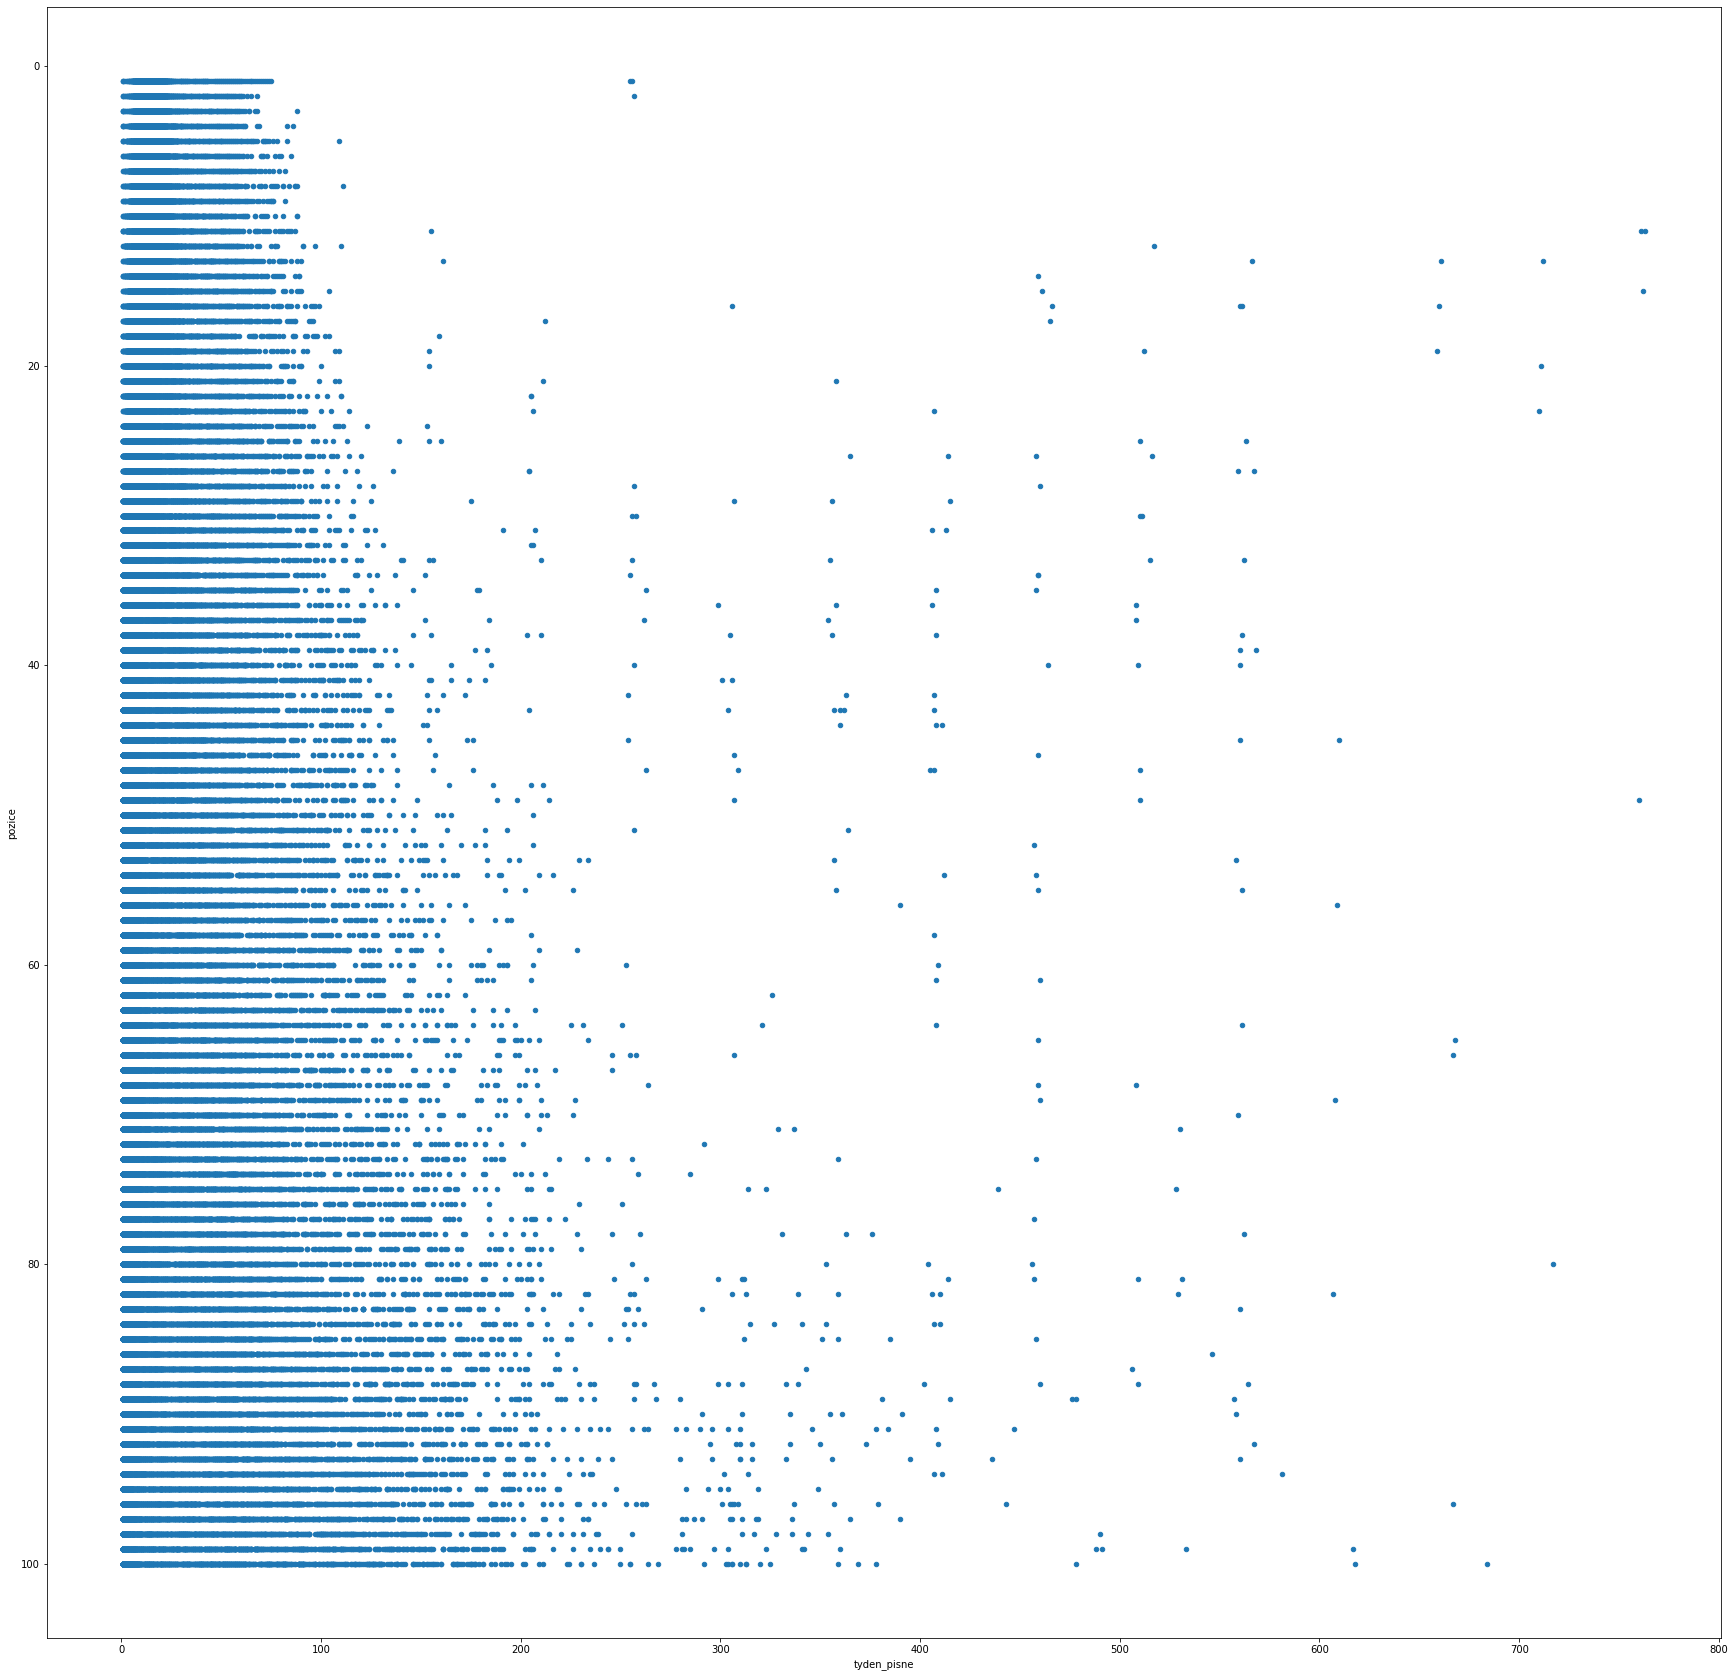

In [12]:
ax = df[['tyden_pisne','pozice']].plot.scatter(x='tyden_pisne',y='pozice',figsize=(30,30))
ax.invert_yaxis()

### Kolik týdnů v průměru trvalo jedničkám státi se jedničkou

<Axes: xlabel='rok'>

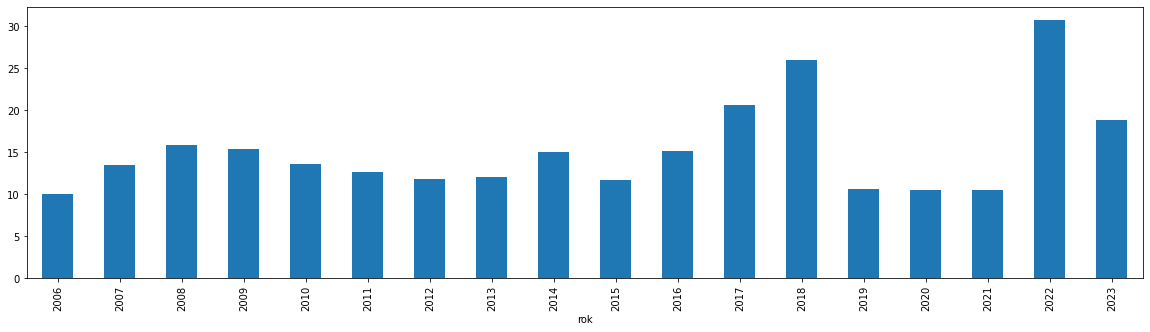

In [13]:
df[df['pozice'] == 1].groupby(['interpret_hlavni','track']).first().groupby('rok')['tyden_pisne'].mean().plot.bar(figsize=(20,5))

### Možná lepší střední hodnota:

<Axes: xlabel='rok'>

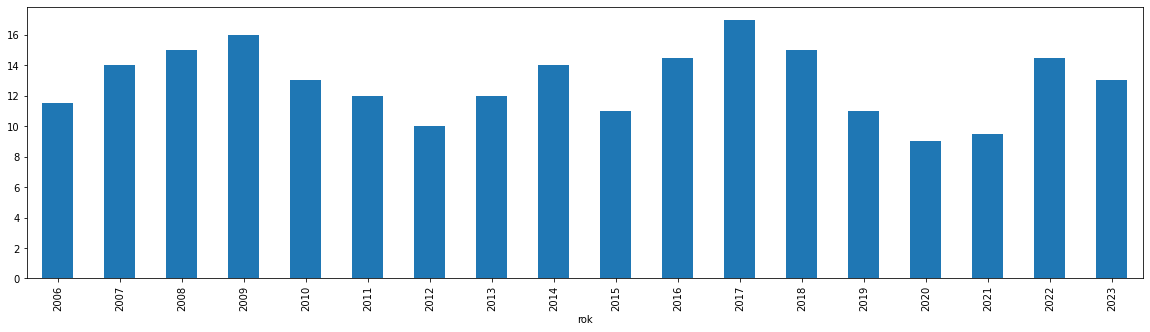

In [14]:
df[df['pozice'] == 1].groupby(['interpret_hlavni','track']).first().groupby('rok')['tyden_pisne'].median().plot.bar(figsize=(20,5))

#### Kontrola: kolik vlastně bylo hitů č. 1

In [15]:
df[df['pozice'] == 1].groupby('rok')['track'].nunique()

rok
2006    14
2007    12
2008    16
2009    13
2010    17
2011    17
2012    14
2013    14
2014    16
2015    14
2016    19
2017    18
2018    23
2019    21
2020    13
2021    11
2022    20
2023     7
Name: track, dtype: int64

Ale jo, to nejsou upe malá čísla → srovnání je ok.

## Pozoruhodné tracky

### Ve kterém týdnu (ne od začátku vysílání, ale od prvního průniku do top 100!) se píseň stala #1

In [16]:
nepocitat = df[df['week'] == '2006-01']['track'].to_list()

In [17]:
df[(~df['track'].isin(nepocitat)) & (df['pozice'] == 1)].groupby(['interpret_hlavni','track'])['tyden_pisne'].min().nsmallest(20)

interpret_hlavni    track             
Lewis Capaldi       Forget Me             1
Ofenbach            Katchi                1
Chinaski            Láska a data          3
Adele               Hello                 4
Support Lesbiens    English Stereo        4
George Ezra         Shotgun               5
Mirai               I přes to všechno     5
Adele               Skyfall               6
Don Omar            Danza Kuduro          6
Ed Sheeran          Bad Habits            6
                    Shape of You          6
Gabry Ponte, Lum!X  Thunder               6
Lewis Capaldi       Before You Go         6
Psy                 Gangnam Style         6
Václav Neckář       Půlnoční              6
Adele               Easy On Me            7
Alec Benjamin       Let Me Down SLowly    7
Avicii              Wake Me Up            7
Carly Rae Jepsen    Call Me Maybe         7
Coldplay            Higher Power          7
Name: tyden_pisne, dtype: int32

### Těmto to naopak trvalo:

In [18]:
df[df['pozice'] == 1].groupby(['interpret_hlavni','track'])['tyden_pisne'].min().nlargest(20)

interpret_hlavni  track                                     
Ewa Farna         Vánoce na míru                                255
Liam Payne        For You (Fifty Shades Freed)                   60
Luis Fonsi        Échame la culpa                                59
Nico Santos       Rooftop                                        57
Avicii            Without You                                    55
Mandrage          Motýli                                         54
Chinaski          Potkal jsem tě po letech                       52
Miley Cyrus       Flowers                                        51
Ed Sheeran        Perfect                                        47
Kryštof           Zůstaň tu se mnou (Za sny)                     44
Emma Drobná       Words                                          42
Chinaski          Měl bych si boty zout                          39
Meduza            Bad Memories (feat. Elley Duhé & FAST BOY)     38
P!Nk              Irrelevant                           

### Nejpozdější top 1 (tentokrát i ty co byly top 1 dříve)

In [19]:
df[df['pozice'] == 1].groupby(['interpret_hlavni','track'])['tyden_pisne'].max().nlargest(20)

interpret_hlavni  track                                     
Ewa Farna         Vánoce na míru                                256
Miley Cyrus       Flowers                                        75
Kryštof           Zůstaň tu se mnou (Za sny)                     65
Liam Payne        For You (Fifty Shades Freed)                   60
Luis Fonsi        Échame la culpa                                59
Chinaski          Potkal jsem tě po letech                       58
Nico Santos       Rooftop                                        57
Avicii            Without You                                    55
Mandrage          Motýli                                         54
Ofenbach          Katchi                                         51
Ed Sheeran        Perfect                                        50
Lewis Capaldi     Forget Me                                      50
Chinaski          Slovenský klín                                 43
Emma Drobná       Words                                

### Držáci top 10

#### Nejdéle od prvního výskytu v žebříčku (vč. pauz, kdy vypadly z top 100!):

In [20]:
df[df['pozice'] <= 10].groupby(['interpret_hlavni','track'])['tyden_pisne'].max().nlargest(20)

interpret_hlavni  track                     
Ewa Farna         Vánoce na míru                257
Václav Neckář     Půlnoční                      111
Kryštof           Vánoční                       109
Chinaski          Potkal jsem tě po letech       88
Miley Cyrus       Flowers                        88
Mirai             Anděl                          88
                  OTCHI                          88
Dermot Kennedy    Kiss Me                        81
Michal Hrůza      Pro Emu                        81
Chinaski          Měl bych si boty zout          77
Luis Fonsi        Échame la culpa                77
Jelen             Ještě jednu noc                76
Kryštof           Co bude pak                    75
Poetika           Půlnoc                         73
Kryštof           Zůstaň tu se mnou (Za sny)     71
P!Nk              What About Us                  70
Slza              Bouře                          68
Lewis Capaldi     Forget Me                      67
David Guetta      I

#### Nejvíce jednotlivých týdnů:

In [21]:
df[df['pozice'] <= 10].groupby(['interpret_hlavni','track'])['tyden_pisne'].nunique().nlargest(20)

interpret_hlavni  track                   
Mirai             Vedle tebe usínám           46
Jelen             Ještě jednu noc             44
Ed Sheeran        Bad Habits                  40
Xindl X           V blbým věku                40
Chinaski          Měl bych si boty zout       39
Mirai             Když nemůžeš, tak přidej    39
Miley Cyrus       Flowers                     37
Mirai             I přes to všechno           37
Xindl X           Cudzinka v tvojej zemi      37
Kryštof           Co bude pak                 36
Chinaski          Slovenský klín              33
Shawn Mendes      Senorita                    33
Ava Max           Kings & Queens              32
O5                BRA3                        32
Ava Max           Sweet but Psycho            31
Chinaski          Potkal jsem tě po letech    31
Kryštof           Ty a já                     31
Alesha Dixon      Boy Does Nothing            30
Lewis Capaldi     Before You Go               30
Harry Styles      As it Wa

### Držáci kdekoliv

#### Nejdéle od prvního výskytu v žebříčku (vč. pauz, kdy vypadly úplně):

In [22]:
df.groupby(['interpret_hlavni','track'])['tyden_pisne'].max().nlargest(20)

interpret_hlavni  track                          
Wham!             Last Christmas                     763
Chinaski          Hvězdy nad hlavou                  717
Divokej Bill      Pocit                              684
Dan Bárta         On My Head                         618
Maroon 5          This Love                          581
Václav Neckář     Půlnoční                           568
Linkin Park       Breaking The Habit                 567
Daniel Landa      Touha                              564
Billy Mack        Christmas Is All Around            563
Lucie             Medvídek                           562
Janek Ledecký     Sliby se maj plnit o Vánocích      561
Mariah Carey      All I Want For Christmas Is You    561
David Guetta      Love Is Gone                       531
John Lennon       Happy Xmas (War Is Over)           510
Queen             Thank God It´s Christmas           510
Mandrage          Hledá se žena                      506
Evanescence       Bring Me To Life    

#### Nejvíce jednotlivých týdnů:

In [23]:
df[df['pozice'] <= 100].groupby(['interpret_hlavni','track'])['tyden_pisne'].nunique().nlargest(20)

interpret_hlavni  track                              
Karel Gott        Srdce nehasnou                         179
Mirai             Když nemůžeš, tak přidej               175
Mandrage          Motýli                                 169
Michal Hrůza      Pro Emu                                164
Mirai             Chci tančit                            150
Marek Ztracený    Naše cesty                             149
Mirai             OTCHI                                  140
Slza              Na srdci (feat. Celeste Buckingham)    139
Chinaski          Láska a data                           137
Marek Ztracený    Tak se nezlob (Podpantoflák)           133
Kelly Clarkson    Stronger (What Doesn´t Kill You)       129
O5                BRA3                                   129
The Weeknd        Blinding Lights                        128
Kryštof           Hned teď (pojď být světlometem)        122
Shawn Mendes      Senorita                               122
Lewis Capaldi     Before You Go

## Grafy jednotlivých písní

In [24]:
vsechnytydny = df['week'].drop_duplicates().to_list()

In [25]:
df

,Unnamed: 0,hitparada,rok,tyden,week,pozice,track,interpret,interpret_hlavni,vydavatel,wk,wk_poprve,tyden_pisne,tyden_pisne_bez_pauz
0,100,CZ - RADIO - TOP 100,2006,1,2006-01,1,Hung Up,Madonna,Madonna,Warner Music,1,1,1,1
1,200,CZ - RADIO - TOP 100,2006,2,2006-02,1,Hung Up,Madonna,Madonna,Warner Music,2,1,2,2
2,300,CZ - RADIO - TOP 100,2006,3,2006-03,1,Hung Up,Madonna,Madonna,Warner Music,3,1,3,3
3,401,CZ - RADIO - TOP 100,2006,4,2006-04,2,Hung Up,Madonna,Madonna,Warner Music,4,1,4,4
4,500,CZ - RADIO - TOP 100,2006,5,2006-05,1,Hung Up,Madonna,Madonna,Warner Music,5,1,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90995,97155,CZ - RADIO - TOP 100,2023,43,2023-43,56,Red Flags,Plain White T´S,Plain White T´S,Universal Music,907,907,1,1
90996,97157,CZ - RADIO - TOP 100,2023,43,2023-43,58,Do It Again,Ray Dalton,Ray Dalton,Sony Music,907,907,1,1
90997,97159,CZ - RADIO - TOP 100,2023,43,2023-43,60,Enough Is Enough,Post Malone,Post Malone,Universal Music,907,907,1,1
90998,97161,CZ - RADIO - TOP 100,2023,43,2023-43,62,Summertime Friends,Chainsmokers,Chainsmokers,Sony Music,907,907,1,1


In [26]:
def cesta_pisne(pisen):
    pracovni = df
    pracovni = pracovni[(pracovni['track'] == pisen)].drop_duplicates(subset=['rok','tyden']).set_index("week", drop=True)
    pracovni = pracovni.reindex(vsechnytydny, fill_value=101).sort_index()
    return pracovni['pozice'].plot(figsize=(20,5)).invert_yaxis()

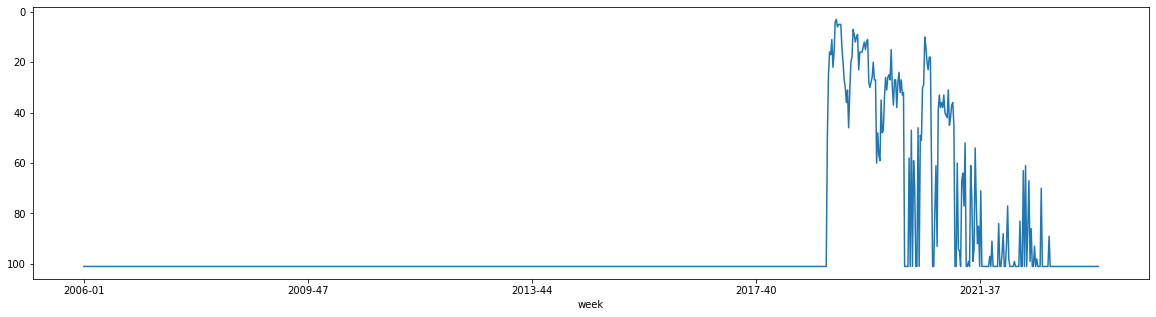

In [27]:
cesta_pisne('OTCHI')

In [28]:
df[df['track'] == 'Srdce nehasnou']['week'].min()

'2019-19'

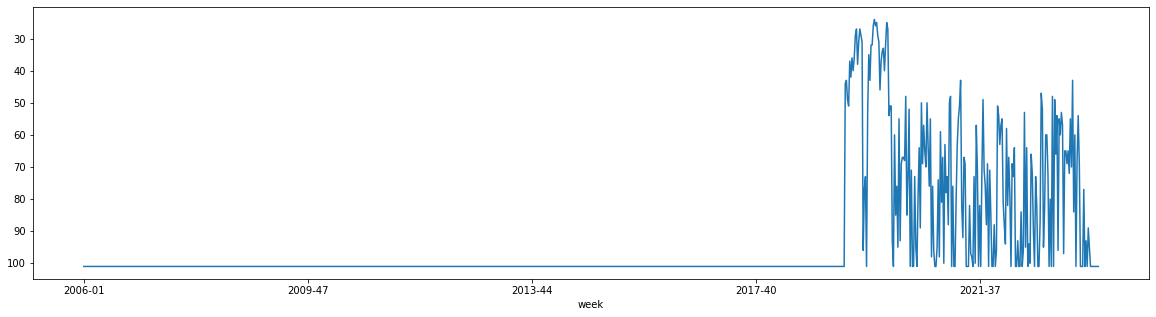

In [29]:
cesta_pisne('Srdce nehasnou')

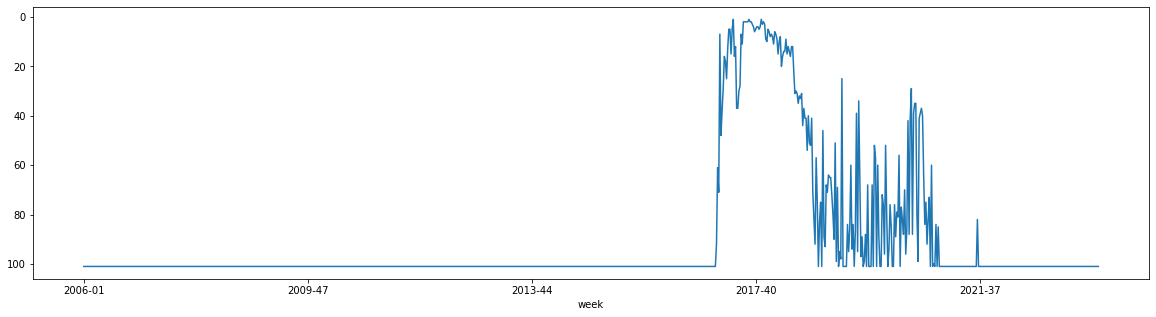

In [30]:
cesta_pisne('Když nemůžeš, tak přidej')

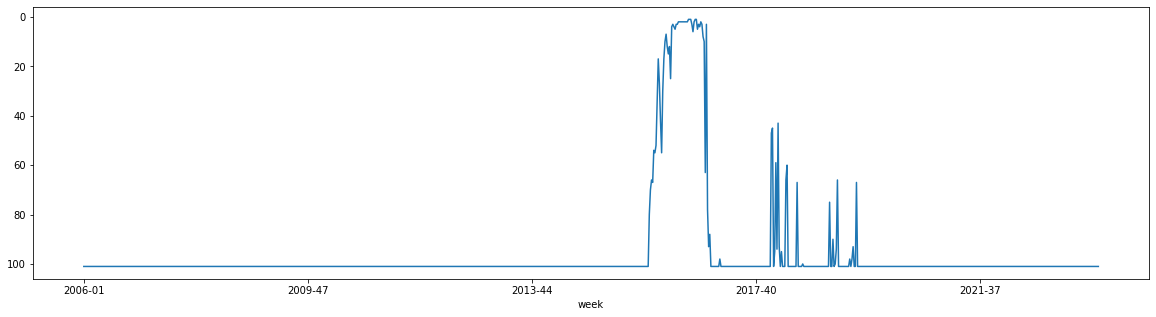

In [31]:
cesta_pisne('Slovenský klín')

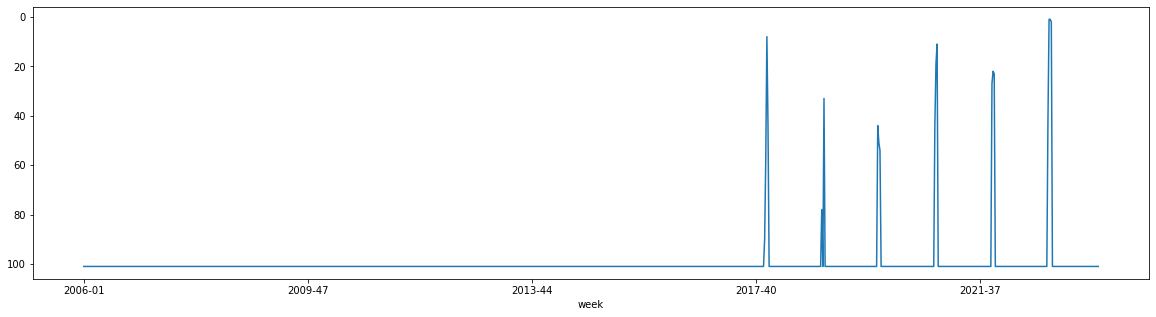

In [32]:
cesta_pisne('Vánoce na míru')

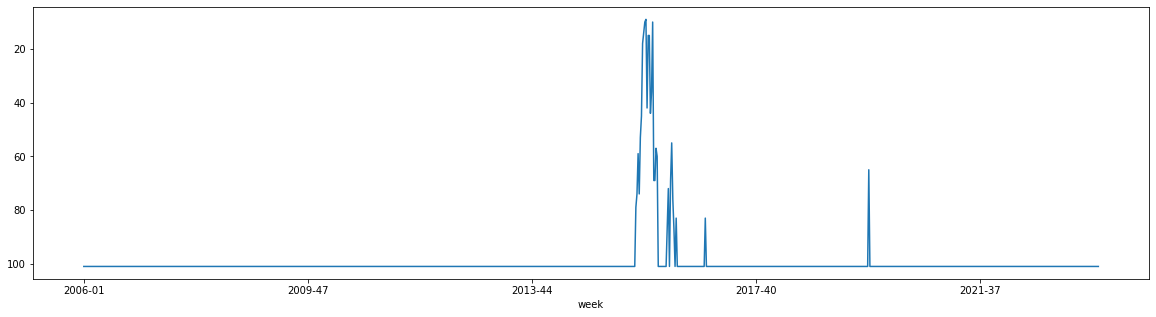

In [33]:
cesta_pisne('Nafrněná')

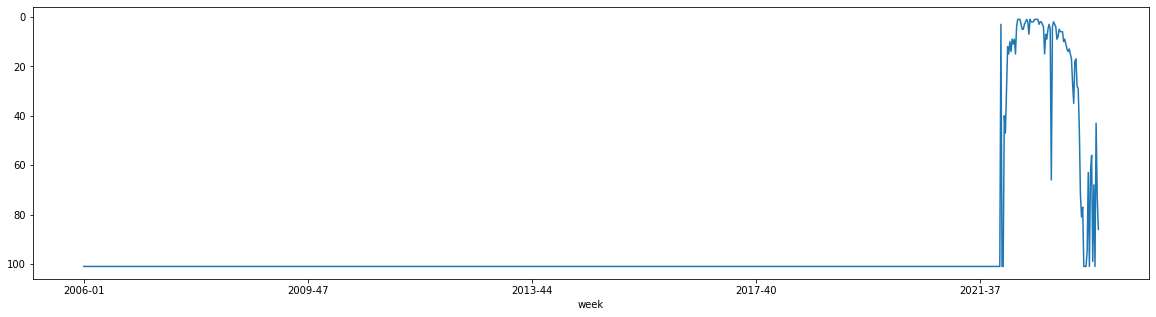

In [34]:
cesta_pisne('Vedle tebe usínám')

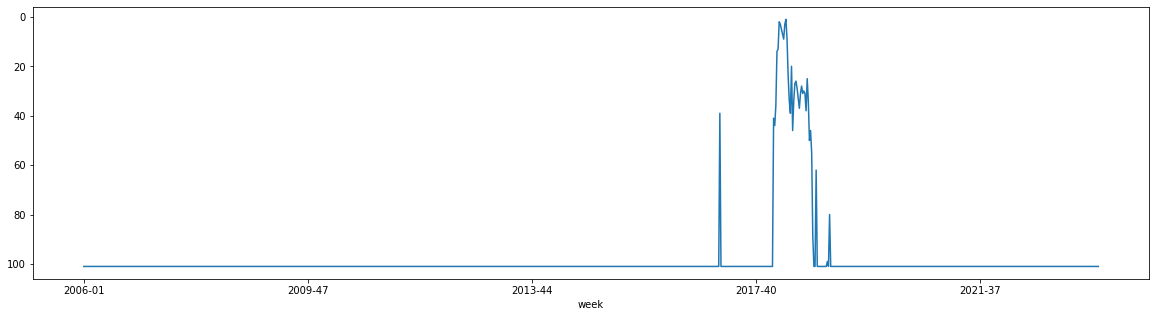

In [35]:
cesta_pisne('For You (Fifty Shades Freed)')

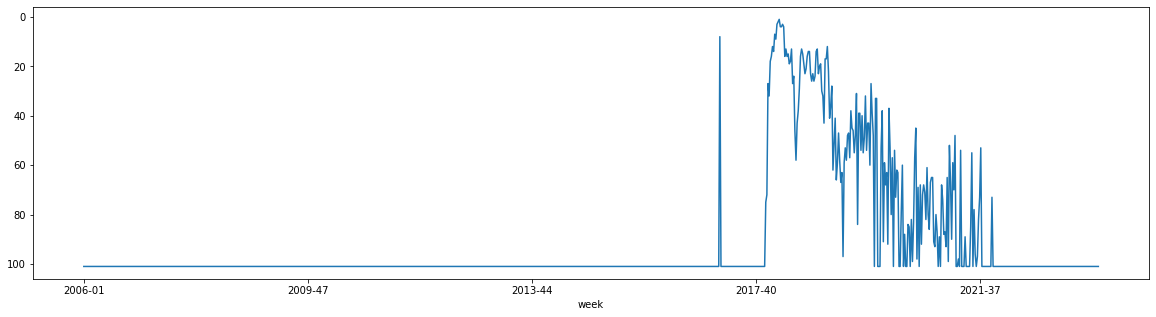

In [36]:
cesta_pisne('Motýli')

## Zprůměrovaná cesta písně

In [37]:
def graf_stredni_pisne(tydny, filtr=df['track'].drop_duplicates().to_list()):
    
    pocet_nasazenych = [i for i in range (1, df[df['track'].isin(filtr)].groupby('tyden_pisne').size().iloc[0] + 1)]
    tydny_pisni = [i for i in range(1,tydny + 1)]
    
    def spocti_stredni_pisen(tyden, pocet):
        jak_si_vedou = pd.Series(df[(df['tyden_pisne'] == tyden) & (df['track'].isin(filtr))]['pozice'])
        jak_si_vedou = jak_si_vedou.reset_index(drop = True)
        jak_si_vedou = jak_si_vedou.reindex(pocet_nasazenych, fill_value=101).sort_index()
        return jak_si_vedou
    
    cesta_stredni_pisne = {}
    for t in tydny_pisni:
        cesta_stredni_pisne[t] = spocti_stredni_pisen(t, pocet_nasazenych).median()
    
    return pd.Series(cesta_stredni_pisne)

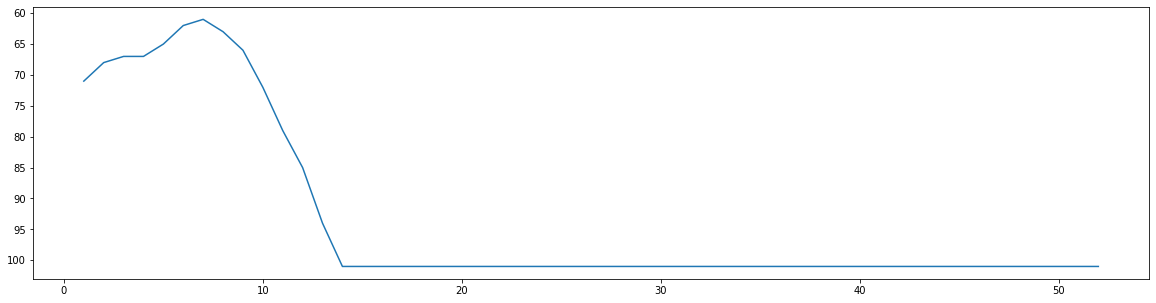

In [38]:
graf_stredni_pisne(52).plot(figsize=(20,5)).invert_yaxis()

### Cesty hitů č. 1

In [39]:
hity1 = df[df['pozice'] == 1]['track'].drop_duplicates().to_list()

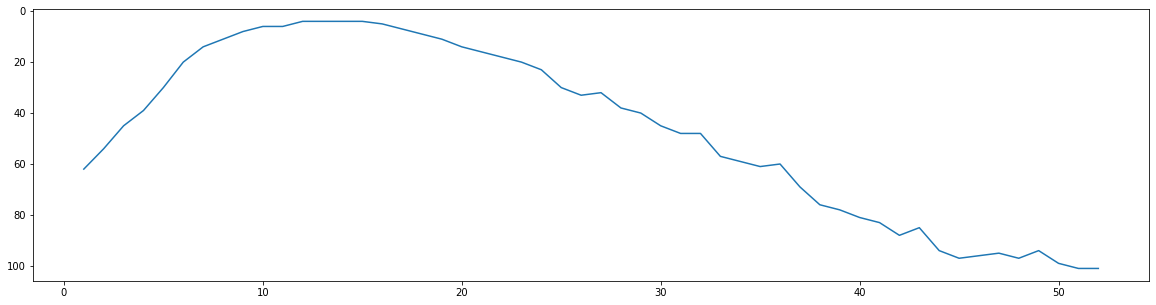

In [40]:
graf_stredni_pisne(52, filtr=hity1).plot(figsize=(20,5)).invert_yaxis()

### Cesty písní z top 10

In [41]:
hity10 = df[df['pozice'] <= 10]['track'].drop_duplicates().to_list()

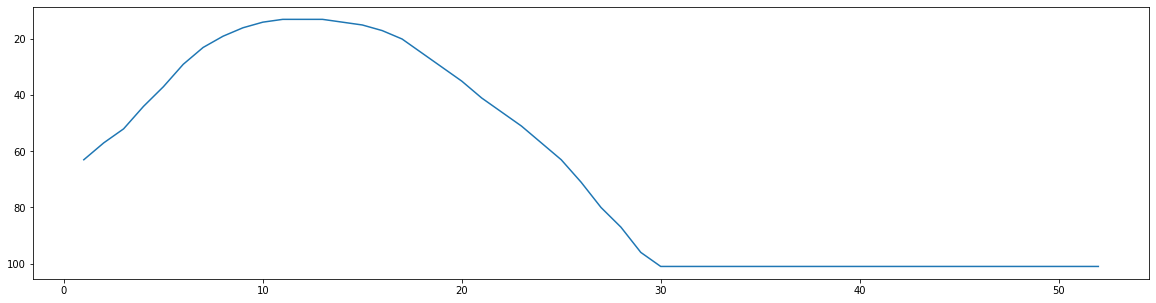

In [42]:
graf_stredni_pisne(52, filtr=hity10).plot(figsize=(20,5)).invert_yaxis()

### Změny v čase

In [43]:
df[df['rok'] == 2021]['wk'].sort_values()

76215    765
78122    765
78108    765
77081    765
77114    765
        ... 
83878    815
77666    815
83888    815
78522    815
84683    815
Name: wk, Length: 5100, dtype: int32

In [44]:
tracky07 = df[(df['wk_poprve'] >= 52) & (df['wk_poprve'] <= 102)]['track'].drop_duplicates().to_list()
tracky15 = df[(df['wk_poprve'] >= 459) & (df['wk_poprve'] <= 510)]['track'].drop_duplicates().to_list()
tracky21 = df[(df['wk_poprve'] >= 765) & (df['wk_poprve'] <= 815)]['track'].drop_duplicates().to_list()
tracky22 = df[(df['wk_poprve'] >= 816) & (df['wk_poprve'] <= 865)]['track'].drop_duplicates().to_list()

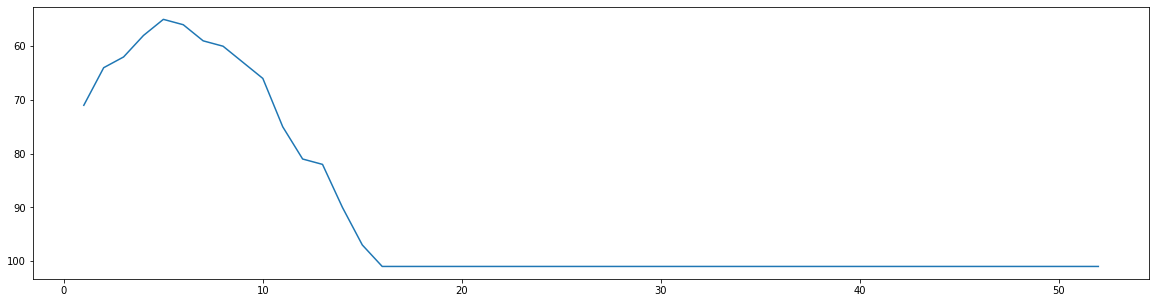

In [45]:
graf_stredni_pisne(52, filtr=tracky07).plot(figsize=(20,5)).invert_yaxis()

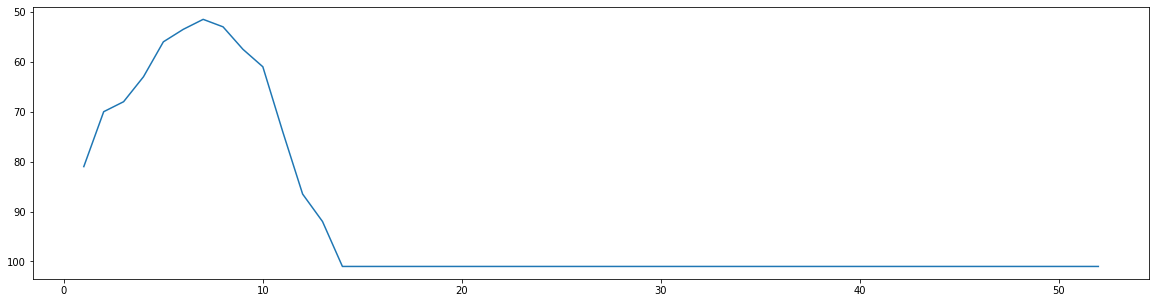

In [46]:
graf_stredni_pisne(52, filtr=tracky15).plot(figsize=(20,5)).invert_yaxis()

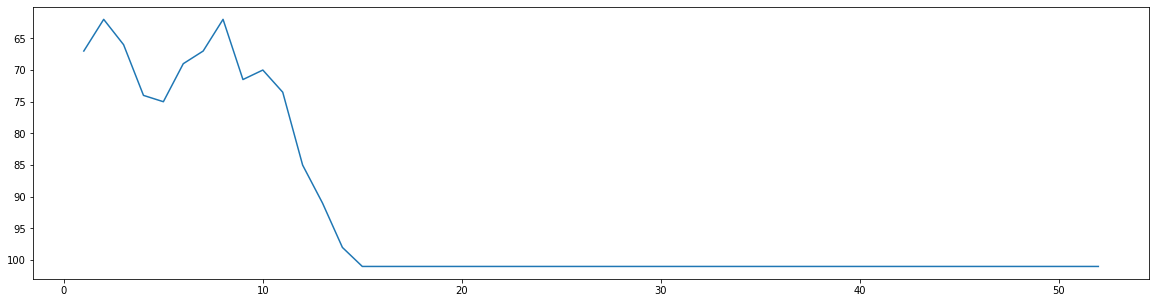

In [47]:
graf_stredni_pisne(52, filtr=tracky21).plot(figsize=(20,5)).invert_yaxis()

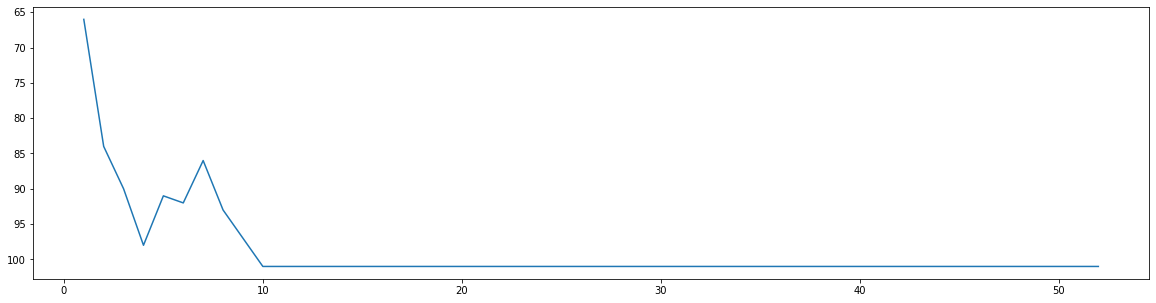

In [48]:
graf_stredni_pisne(52, filtr=tracky22).plot(figsize=(20,5)).invert_yaxis()

Sám nevím: je možné, že teď cokoliv, co se hned nechytí, stahujou po 1-3 týdnech z vysílání?